In [35]:
#load libraries
import lib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import NearestNeighbors

In [107]:
def plotting_funciton(clf,X,y):
    C = 1.0  # SVM regularization parameter
    # models = (svm.SVC(kernel='linear', C=C),
    #           svm.LinearSVC(C=C, max_iter=10000),
    #           svm.SVC(kernel='rbf', gamma=0.7, C=C),
    #           svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
    # models = (clf.fit(X, y) for clf in models)

    # title for the plots
    # title = 'SVC with linear kernel'

    # # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(1,1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    ax= sub

    X0, X1 = X[:,0], X[:,1]
    xx, yy = lib.make_meshgrid(X0, X1)

    # # ###########################################################################
    w = clf.coef_[0]
    a = -w[0] / w[1]
    XX = np.linspace(-5, 5)
    YY = a * XX - (clf.intercept_[0]) / w[1]
    ax.plot(XX, YY, "-")
    # # ###########################################################################

    # for clf, title, ax in zip(models, titles, sub.flatten()):
    lib.plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('0')
    ax.set_ylabel('1')
    ax.set_xticks(())
    ax.set_yticks(())
    # ax.set_title(title)

    plt.show()

In [108]:
#load dataset
X,y = lib.generate_triangle(samples=500)

In [129]:
#caluculate nearest neighbors
def find_nn(X,y,n_neighbors=50,n_most_different=50):
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    ys = y[indices]
    Xs = X[indices]
    most_different_nn = np.argsort(-np.var(ys,1))[:n_most_different]
    most_different_var = -np.sort(-np.var(ys,1))[:n_most_different]
    return Xs[most_different_nn],ys[most_different_nn],most_different_var

In [153]:
def find_proper_devision(X,y):
    Xs,ys,var = find_nn(X,y)
    combined_score = []
    clf = LinearSVC(random_state=0, tol=1e-5)
    for i in range(len(ys)):
        clf.fit(Xs[i], ys[i])
#         print(f'{clf.score(Xs[i],ys[i])} {clf.score(X,y)}')
#         plotting_funciton(clf,X,y)
        combined_score.append(clf.score(Xs[i], ys[i])*var[i])
    am = np.argmax(combined_score)
    return clf.fit(Xs[am], ys[am])
        

In [154]:
cs = find_proper_devision(X,y)
cs

LinearSVC(random_state=0, tol=1e-05)

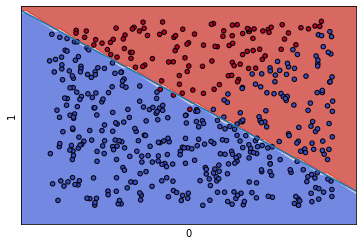

In [155]:
plotting_funciton(cs,X,y)

0.62

In [65]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X, y)

LinearSVC(random_state=0, tol=1e-05)

In [85]:
Xs[0][:,1]

array([0.77493376, 0.76401506, 0.76223998, 0.80726695, 0.78293408,
       0.78882496, 0.7516989 , 0.73849351, 0.7745142 , 0.74593947,
       0.79224363, 0.81954839, 0.87451443, 0.67254473, 0.66556264,
       0.76448086, 0.87303443, 0.75589388, 0.89140041, 0.79010712,
       0.82254567, 0.65161355, 0.90703364, 0.77807167, 0.78048614,
       0.91867616, 0.67882283, 0.87657356, 0.80324329, 0.61844705,
       0.6143587 , 0.6495276 , 0.94059514, 0.85089717, 0.64228239,
       0.59631737, 0.72047263, 0.69461019, 0.60110546, 0.57999935,
       0.59966431, 0.97046745, 0.86777343, 0.9440368 , 0.56546174,
       0.96737978, 0.55772985, 0.99447555, 0.78340664, 0.99610369])

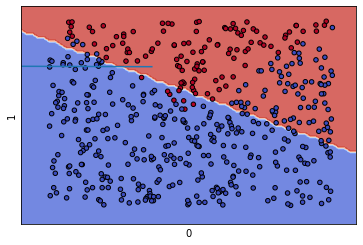

In [105]:
plotting_funciton(clf,X,y)

In [4]:
#save only points with ratio of over 30% 

In [5]:
#calculate SVM for these points

In [6]:
#calculate accuracy of these points

In [ ]:
#split using point of highest accuracy